In [274]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [275]:
df = pd.read_csv('../data.csv', index_col=0)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 42176 entries, 0 to 42175
Columns: 486 entries, index to SOCONPA
dtypes: float64(471), int64(13), object(2)
memory usage: 156.7+ MB


In [276]:
print(df['REPEAT'].dtypes)
str_cols = df.select_dtypes(include=["object"]).columns.tolist()
print(str_cols)
df = df.drop(str_cols, axis=1)


float64
['CNT', 'STRATUM']


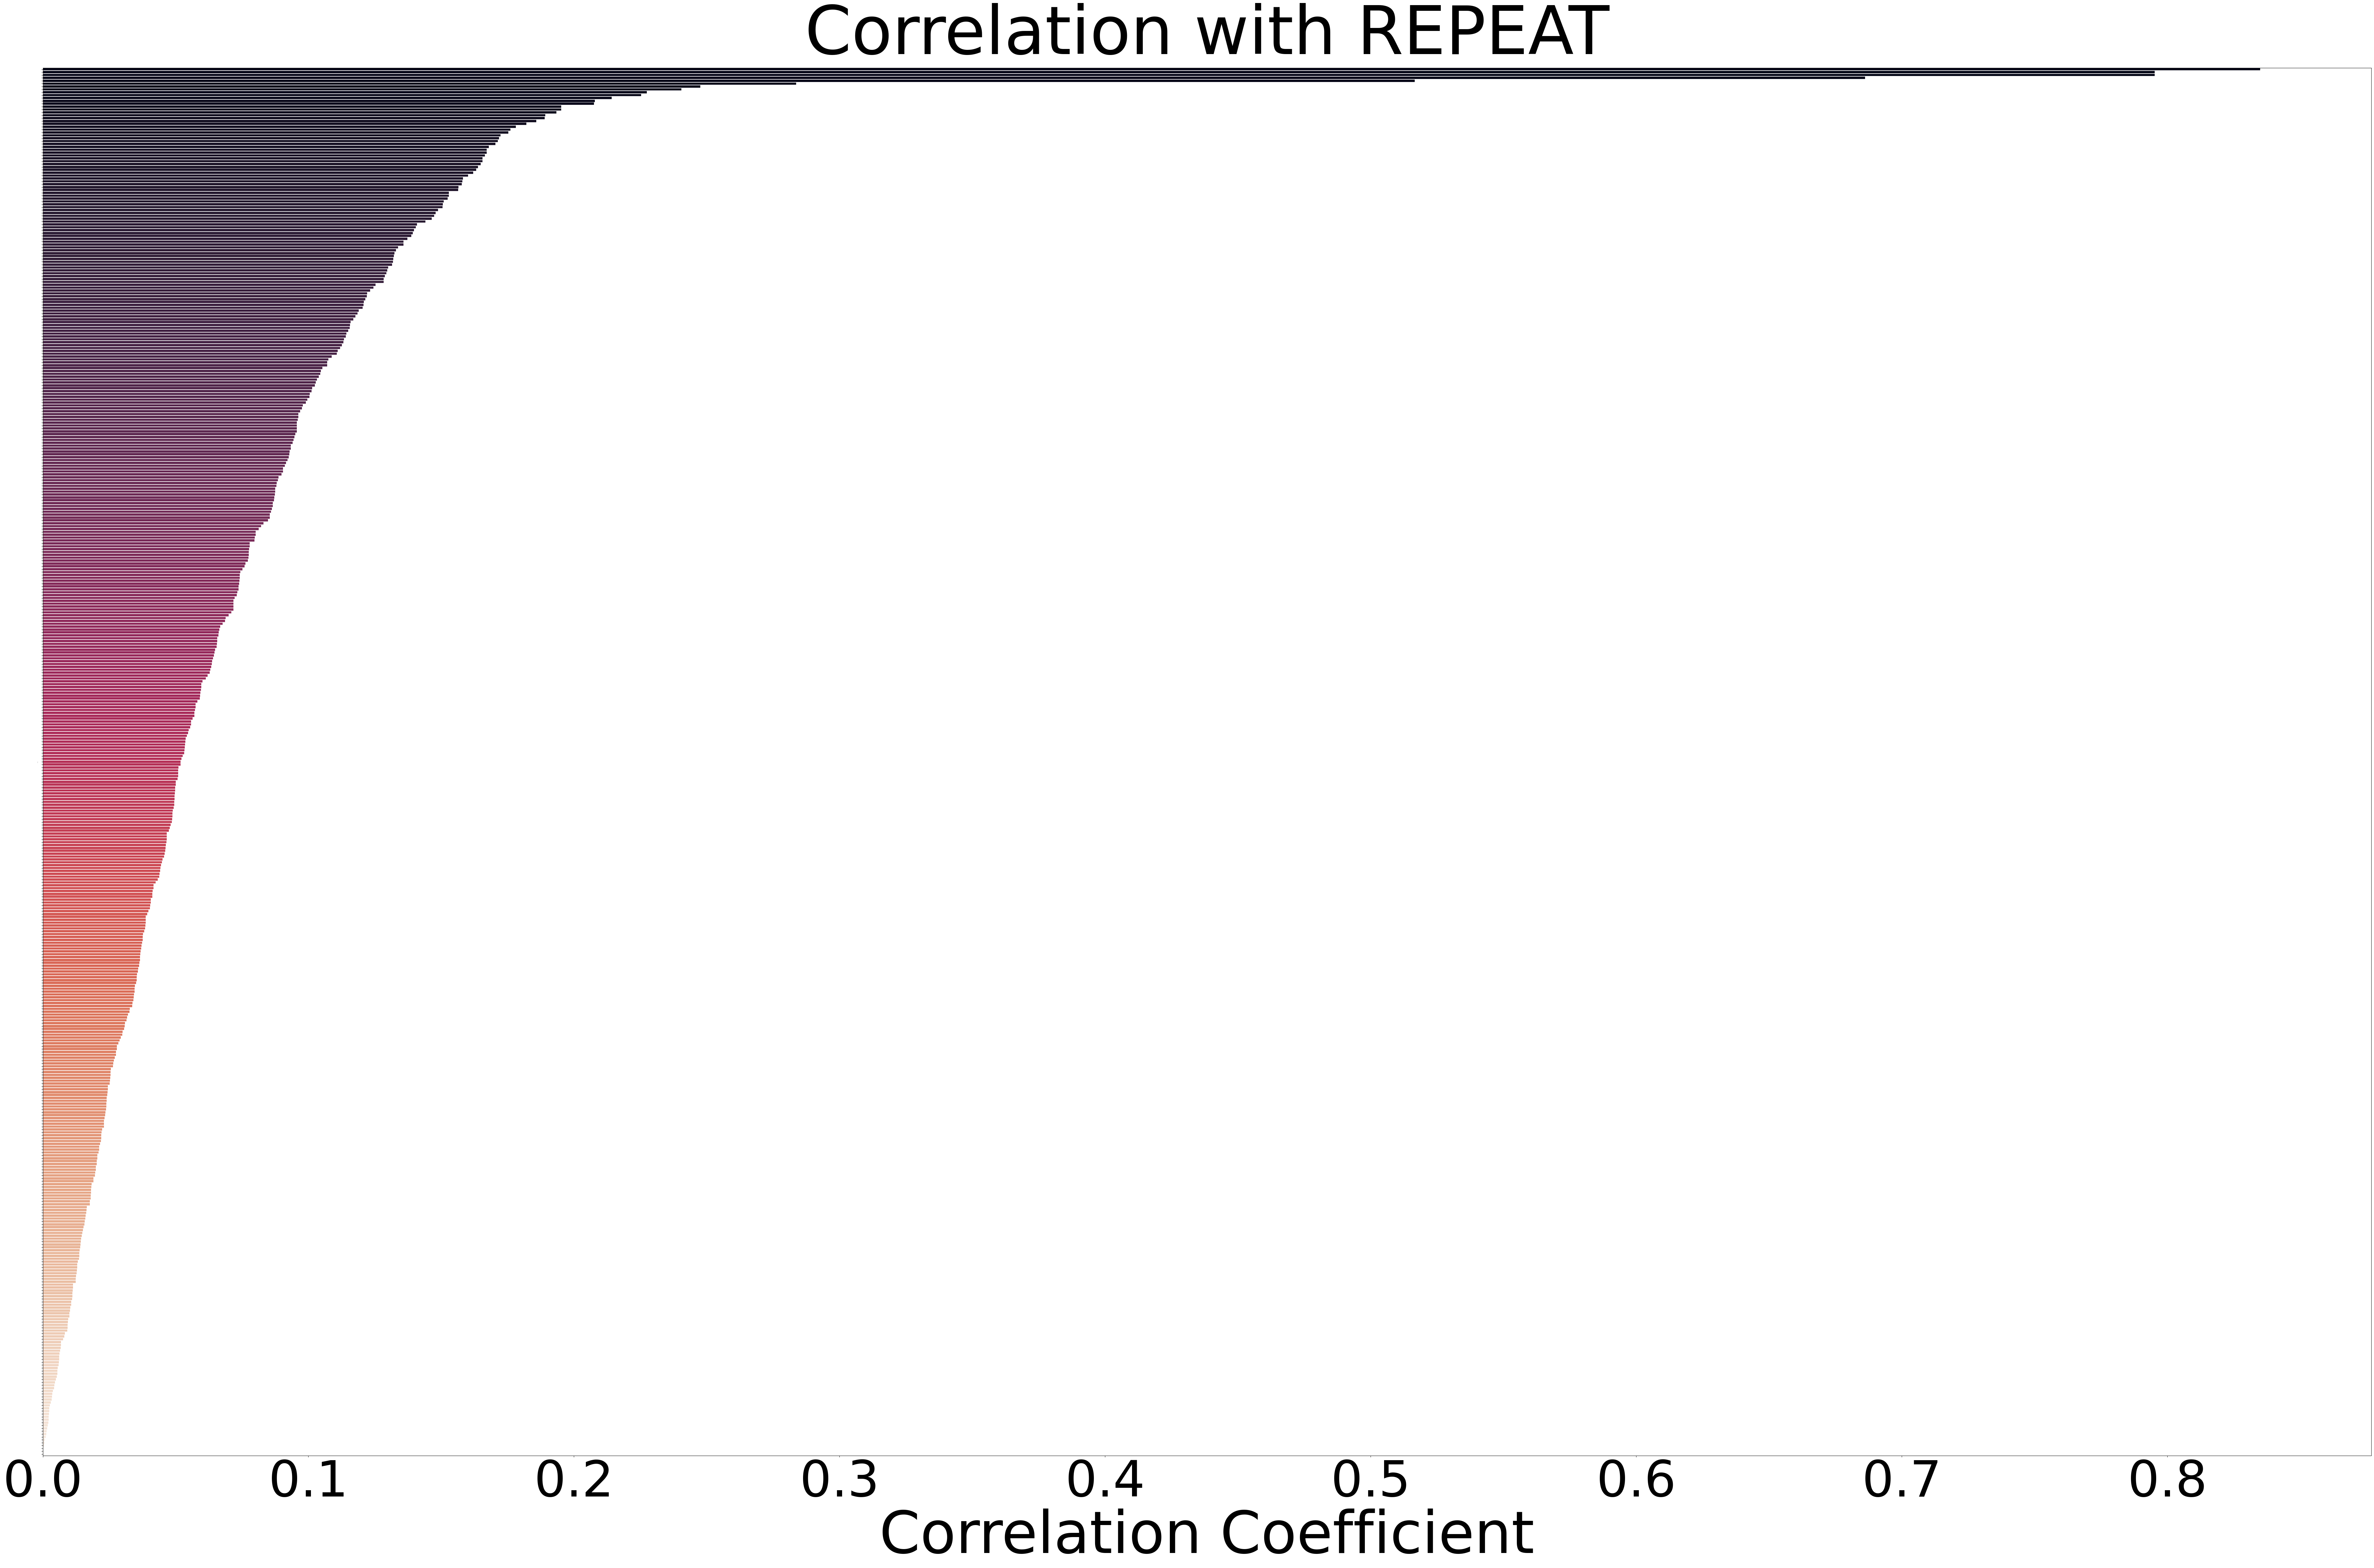

In [277]:

corr = df.corrwith(df['REPEAT']).drop('REPEAT')
corr_sort = corr.abs().sort_values(ascending=False)

plt.figure(figsize=(100, 60))
ax = sns.barplot(y=corr_sort.index, x=corr_sort.values, palette='rocket')
plt.title('Correlation with REPEAT', fontsize=160)
plt.xlabel('Correlation Coefficient', fontsize=140)
plt.xticks(fontsize=120)
plt.ylabel('Features', fontsize=0)
ax.set(yticklabels=[])
plt.savefig('../image/corr.jpg')
plt.show()

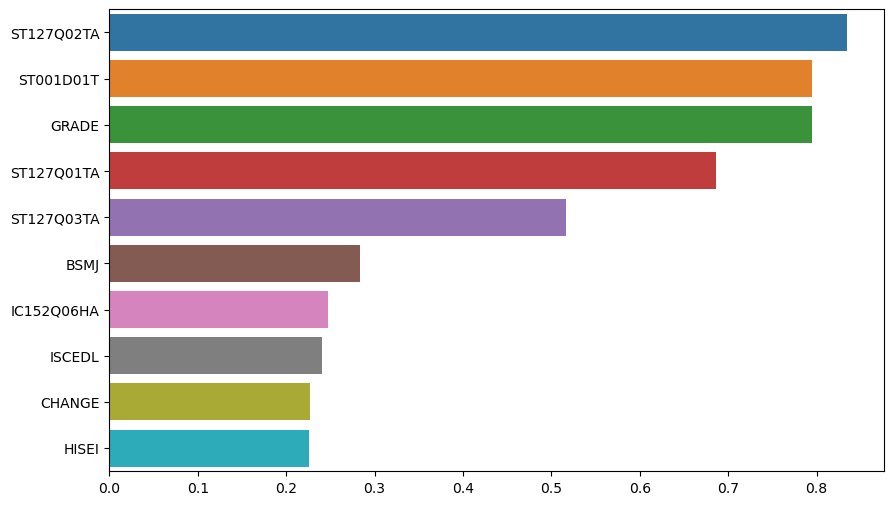

In [278]:
corr_sort = corr.abs().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_sort.values[:10], y=corr_sort.index[:10])
plt.savefig("../image/corrTop10.jpg")


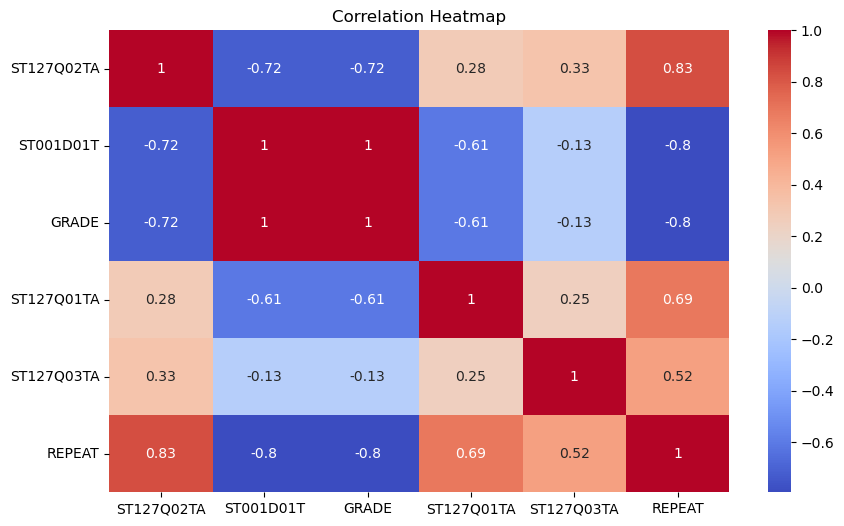

In [279]:

df1 = df[list(corr_sort.index[:5])+["REPEAT"]]
corr_matrix = df1.corr()



plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# 设置图像属性
plt.title('Correlation Heatmap')
plt.savefig("../image/corrHeat.jpg", dpi=240)
plt.show()


In [280]:

df1 = df1.drop("GRADE", axis=1)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 42176 entries, 0 to 42175
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ST127Q02TA  40543 non-null  float64
 1   ST001D01T   42176 non-null  float64
 2   ST127Q01TA  40055 non-null  float64
 3   ST127Q03TA  14385 non-null  float64
 4   REPEAT      42102 non-null  float64
dtypes: float64(5)
memory usage: 1.9 MB


In [281]:

df1 = df1.drop("ST127Q03TA", axis=1)
df2 = df1.dropna()


/var/folders/_x/dm2v9rdd4gx0s_zjnyjk4lg00000gn/T/ipykernel_33002/2351662734.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["REPEAT"])


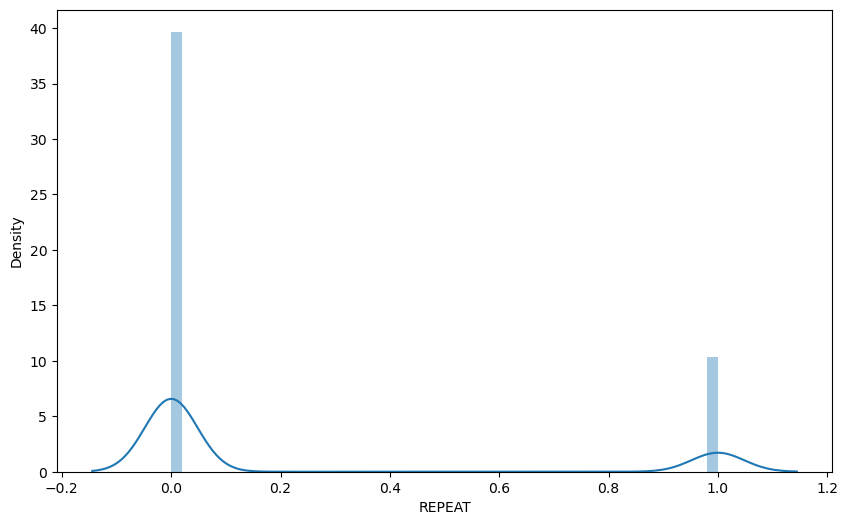

In [282]:
plt.figure(figsize=(10, 6))
sns.distplot(df["REPEAT"])

# sns.histplot(df['REPEAT'], kde=True)
# sns.kdeplot(df['REPEAT'])


# 设置图像属性
# plt.title('Correlation Heatmap')
plt.savefig("../image/repeat.jpg", dpi=240)
plt.show()

In [283]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df2.drop("REPEAT", axis=1), df2["REPEAT"])
score = lr.score(df2.drop("REPEAT", axis=1), df2["REPEAT"])
print(score)


0.8264318767950994


In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 建立逻辑回归模型
lr = LogisticRegression()

# 模型训练
lr.fit(df2.drop("REPEAT", axis=1), df2["REPEAT"])
score = lr.score(df2.drop("REPEAT", axis=1), df2["REPEAT"])
print(score)

print(lr.coef_) # 输出权重向量
print(lr.intercept_) # 输出截距


0.9963246712910239
[[ 9.73672631 -1.94689903  9.16691745]]
[-5.23556624]


In [285]:
df1.fillna(df1.mean(), inplace=True)

In [286]:
pred = lr.predict(df1.drop("REPEAT", axis=1))

print(classification_report(df1['REPEAT'].astype(int), pred.astype(int)))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     33477
           1       1.00      0.97      0.98      8699

    accuracy                           0.99     42176
   macro avg       0.99      0.98      0.99     42176
weighted avg       0.99      0.99      0.99     42176



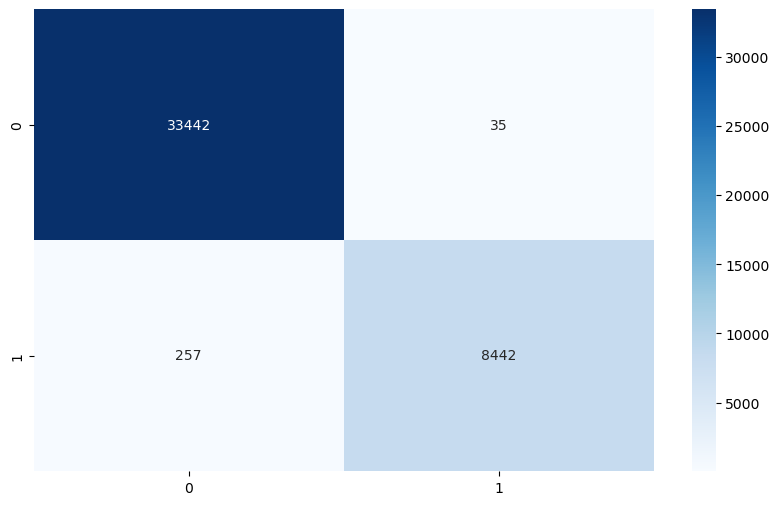

In [287]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# 计算混淆矩阵
cm = confusion_matrix(df1['REPEAT'].astype(int), pred.astype(int))

# 可视化混淆矩阵
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.savefig("../image/result.jpg", dpi=240)
plt.show()
